In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [30]:
df = pd.read_csv('dulieuxettuyendaihoc.csv')

In [31]:
df=df[['NGONNGU','TOANLOGICPHANTICH','GIAIQUYETVANDE','DINHHUONGNGHENGHIEP']]

In [32]:
df.rename(columns={'TOANLOGICPHANTICH' : 'LOGIC',
                    'GIAIQUYETVANDE': 'UNGXU',
                    'DINHHUONGNGHENGHIEP' : 'DINHHUONG'}, inplace = True)
df

,NGONNGU,LOGIC,UNGXU,DINHHUONG
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No
...,...,...,...,...
95,5.25,1.50,6.25,Yes
96,5.25,3.75,4.75,No
97,7.00,8.00,4.00,Yes
98,5.00,3.50,5.50,No


In [33]:
# Do biến DINH HUỐNG là dạng categorical values (định tính) nên cần 4 trong bài này biến ĐỊNH HƯƠNG chỉ có 2 gia tri MolYes nen ta đã đã

# A nhưng nếu như số lượng giá trị nhiều hơn 2 thì ta còn dùng PHOE 1 biến đổi về dạng một vector số tương ứng
dinhhuong = pd.get_dummies(df[ 'DINHHUONG'], drop_first=True)
df.drop('DINHHUONG', axis=1, inplace=True)
df = pd.concat([df, dinhhuong], axis=1)
df.head(5)

,NGONNGU,LOGIC,UNGXU,Yes
0,3.25,3.25,4.50,0
1,6.00,4.00,3.50,1
2,5.00,6.75,4.00,0
3,4.25,4.25,5.25,0
4,4.25,4.50,5.00,0


In [34]:
X = df[['NGONNGU','LOGIC', 'UNGXU']].values #input
y = df[['Yes']].values #output
#Chia tách ra training và testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
import pickle
pickle.dump(classifier,open('logisticregression.sav','wb'))

loaded_model= pickle.load(open('logisticregression.sav','rb'))

vNN=float(input("nhap nn :"))
vlogic=float(input("nhap lg :"))
vUX=float(input("nhap ux :"))

y_pred=loaded_model.predict([[vNN,vlogic,vUX]])
print('Dự báo định hướng:'+str(y_pred[0]))

nhap nn :


ValueError: could not convert string to float: ''

Z =-1.2971+0.3197+NN-0.043*LG+0.0289*UX
f(z) = 1/(1+e^-Z)
sigmod
f(z) = threshold = 0.5

In [37]:
X_test

array([[3.75, 4.5 , 4.25],
       [4.75, 2.  , 5.5 ],
       [3.5 , 4.75, 3.5 ],
       [5.75, 3.5 , 4.25],
       [4.75, 6.5 , 8.  ],
       [2.75, 3.75, 5.  ],
       [2.25, 3.5 , 5.  ],
       [3.75, 4.  , 3.5 ],
       [2.  , 5.25, 3.5 ],
       [4.  , 4.75, 5.5 ],
       [5.  , 4.  , 6.75],
       [2.5 , 3.5 , 6.5 ],
       [5.25, 4.5 , 4.75],
       [4.25, 2.75, 3.25],
       [5.  , 3.5 , 5.5 ],
       [1.5 , 4.5 , 5.5 ],
       [4.75, 4.75, 4.5 ],
       [6.5 , 4.5 , 8.  ],
       [2.25, 4.  , 4.25],
       [2.5 , 2.75, 5.5 ]])

In [38]:
#Default threshold is 0.5
y_pred_test = classifier.predict(X_test)
y_pred_test

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0],
      dtype=uint8)

In [39]:
print(classifier.predict_proba(X_test))
#0.5421 Giá trị mô hình hồi quy tuyến tính là z
#0.4578 Giá trị mô hình sau khi đi qua hàm 1(1+e^(-Z))

[[0.54215376 0.45784624]
 [0.42686728 0.57313272]
 [0.56989436 0.43010564]
 [0.37434035 0.62565965]
 [0.45685782 0.54314218]
 [0.60701717 0.39298283]
 [0.64196612 0.35803388]
 [0.54218784 0.45781216]
 [0.68624869 0.31375131]
 [0.51592045 0.48407955]
 [0.41956957 0.58043043]
 [0.61315482 0.38684518]
 [0.41943042 0.58056958]
 [0.49065667 0.50934333]
 [0.42312774 0.57687226]
 [0.70106665 0.29893335]
 [0.46326149 0.53673851]
 [0.30601715 0.69398285]
 [0.65184076 0.34815924]
 [0.6123461  0.3876539 ]]


In [40]:
print('Prediction with 0.9: ')
y_pred_test_new_threshold = (classifier.predict_proba(X_test)[:,1] >= 0.9).astype(int)
y_pred_test_new_threshold

Prediction with 0.9: 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
#Default threshold = 0.5
result = pd.DataFrame ({'Actual': y_test.flatten(), 'Predicted': y_pred_test})
result

,Actual,Predicted
0,1,0
1,0,1
2,1,0
3,1,1
4,0,1
5,0,0
6,0,0
7,1,0
8,0,0
9,1,0


Kết quả dự báo chính xác là: 35%
(0 0) (1 1)

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

0.35

In [43]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
cf_matrix
#Giá trị
#TP (Actual = 1, Prediction = 1) = 2
#FP (Actual = 0, Prediction = 1) = 7
#FN (Actual = 1, Prediction = 0) = 6
#TN (Actual = 0, Prediction = 0) = 5

array([[5, 7],
       [6, 2]], dtype=int64)

TP + TN /(TP+TN+FP+FN)

Text(0.5, 23.52222222222222, 'Prediction label')

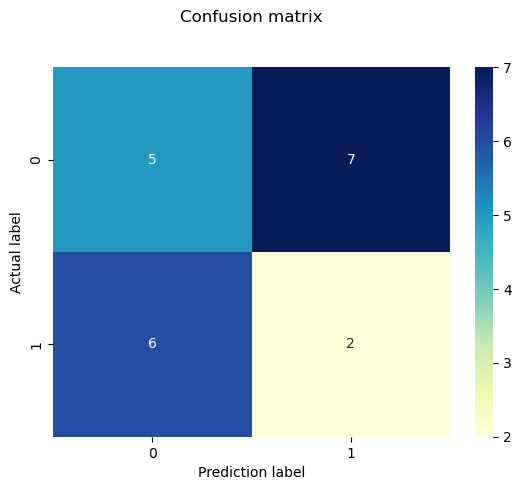

In [44]:
sns.heatmap(pd.DataFrame(cf_matrix), annot = True, cmap="YlGnBu", fmt = 'g')
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Prediction label')

- Các độ đo đánh giá mô hình phân lớp
- N là số lượng mẫu = TP+FP+FN+TN
- TP,FP,FN,TN
- accuracy = (TP+TN)/(TP+FP+FN+TN)
- Precision = TP/(TP+FP)
- Recall = TP/(TP+FN)
- F1-Score = 2*Precision *Recall/(Precision+Recall)

In [45]:
from sklearn.metrics import classification_report
target_names = ('Not oriented', 'Oriented')
print(classification_report(y_test, y_pred_test, target_names = target_names))

              precision    recall  f1-score   support

Not oriented       0.45      0.42      0.43        12
    Oriented       0.22      0.25      0.24         8

    accuracy                           0.35        20
   macro avg       0.34      0.33      0.34        20
weighted avg       0.36      0.35      0.35        20



In [46]:
import pickle
pickle.dump(classifier,open('logisticregression.sav','wb'))

loaded_model= pickle.load(open('logisticregression.sav','rb'))

vNN=float(input("nhap nn :"))
vlogic=float(input("nhap lg :"))
vUX=float(input("nhap ux :"))

y_pred=loaded_model.predict([[vNN,vlogic,vUX]])
print('Dự báo định hướng:'+str(y_pred[0]))

nhap nn :


ValueError: could not convert string to float: ''